In [ ]:
!pip install brian2tools

     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 1.2MB 32.3MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257131 sha256=fa691434e42882ad6883e924638744c1de4aba6cfaa5b6fa1cd7525de23c8b90
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [1]:
from brian2 import *
%matplotlib inline
import random
import math
from brian2tools import brian_plot , plot_raster

In [6]:
R = 0.7
tau = 250*ms
v_rest = -75 
v_reset = -60
v_th = -50
#I_0 = (random.random() ** 2)
#p_exc = 0.1
#p_inh = 0.05
#w_exc = 7*volt
#w_inh = -8*volt

In [54]:
start_scope()

# LIF equation
eqs = '''
 dv/dt = ((v_rest-v) + (R*I)) /tau : 1
  I : 1
'''

I = []
#tau = []
for i in range(1000):
  I.append(rand() * 60)

#for i in range(1000):
  #tau.append(200)
  
neuron_pop = NeuronGroup(1000, eqs, threshold='v>= v_th', reset='v = v_reset', method = 'exact')

neuron_pop.v = v_rest
neuron_pop.I = I
#neuron_pop.tau = tau*ms

exc_pop = neuron_pop[:800]
inh_pop = neuron_pop[800:]

S_e = Synapses(exc_pop, neuron_pop, on_pre='v_post += 0.03')
S_e.connect(p=0.1)

S_i = Synapses(inh_pop, neuron_pop, on_pre='v_post -= 0.01')
S_i.connect(p=0.2)


state_monitor = StateMonitor(neuron_pop, ["v"], record=True)
spike_monitor = SpikeMonitor(neuron_pop)

monitor_exc = SpikeMonitor(exc_pop)
monitor_inh = SpikeMonitor(inh_pop)

run(1000*ms)

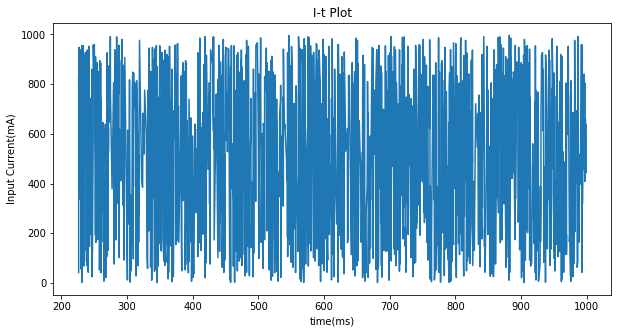

In [55]:
plt.figure(figsize=(10,5))
plt.plot(spike_monitor.t/ms, spike_monitor.i)
plt.ylabel('Input Current(mA)')
plt.xlabel('time(ms)')
plt.title('I-t Plot')
plt.show()

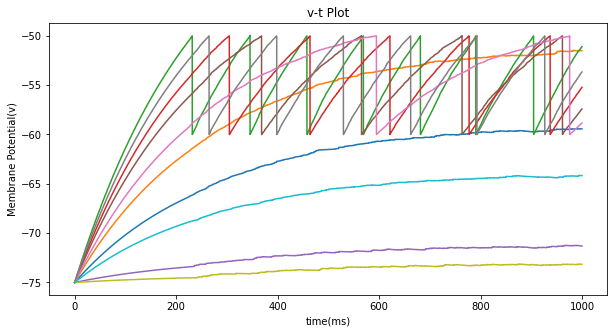

In [56]:
plt.figure(figsize=(10,5))
for i in range(10):
  plot(state_monitor.t/ms, state_monitor.v[i])
plt.ylabel('Membrane Potential(v)')
plt.xlabel('time(ms)')
plt.title('v-t Plot')
plt.show()

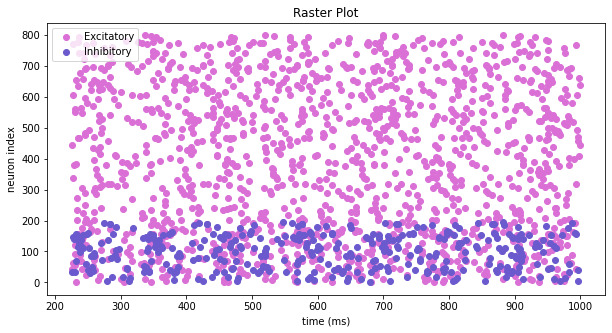

In [57]:
plt.figure(figsize=(10,5))
plt.scatter(monitor_exc.t/ms,
           monitor_exc.i, label='Excitatory',color=['orchid'])
plt.scatter(monitor_inh.t/ms,
           monitor_inh.i, label='Inhibitory',color=['slateblue'])
plt.legend()
plt.title('Raster Plot')
plt.xlabel('time (ms)')
plt.ylabel('neuron index')
plt.show()